# 1- Intoduction



```
================================================================================================================
||                                                                                                            ||
|| Milestsone 1                                                                                               ||
||                                                                                                            ||
|| Nama            : Rio Ardiarta Makhiyyuddin                                                                ||
||                                                                                                            ||
|| Objective       : Project ini dibuat untuk menentukan pencapaian target perusahaan agar bisa meningkatkan  ||
||                   penjualan dan kepuasaan pelanggan                                                        ||
||                                                                                                            ||
|| Link Tableau    : https://public.tableau.com/shared/BRM3XD2Q3?:display_count=n&:origin=viz_share_link      ||
||                                                                                                            ||
|| Link Dataset    : https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset       ||
||                                                                                                            ||
================================================================================================================

# 2- Identifikasi Masalah

**SMART FRAME**

```
1. SPESIFIC    : Perusahaan harus menargetkan penjualan lebih banyak dan meningkatkan kepuasan pelanggan

2. MEASURABLE  : Meningkatkan penjualan rata rata 60 (USD) menjadi 80 (USD) dan kepuasaan pelanggan dari
                 review rating 3 menjadi 4

3. ACHIVEABLE  : Perusahaan harus menyediakan produk yang lebih menarik dan memperbaiki pelayanan
                 untuk mendapatkan kepuasan pelanggan

4. RELEVANT    : Perusahaan akan mendapatkan penjualan lebih banyak dan pelayanan yang lebih baik

5. TIME-BOND   : Target yang harus tercapai selama 3 bulan untuk meningkatkan pelayanan dan produk yang menarik

**Problem Statement**

Tujuan untuk meningkatkan penjualan dalam waktu 3 bulan, untuk mencapai target yang ditentukan maka perusahaan dapat menjual produk lebih menarik, produk perempuan lebih banyak dan meningkatkan kepuasaan pelanggan agar dapat mencapai target sebesar 15%.

**Defining Problem  :**

1. Gender apakah yang melakukan jumlah pembelian paling banyak

2. Category apakah yang jumlahnya paling banyak dibeli

3. Dimanakah Location paling banyak mendapatkan penjualan dari produk Clothing ?

4. Mencari pembelian produk Size dengan jumlah terbanyak

5. Mencari tahu rata - rata rating yang di berikan sesuai gender

6. Siapakah yang melakukan Previous Purchases terbesar sesuai dengan Gender dengan score tertinggi

7. Penjualan pada setiap Season yang memiliki score paling tinggi

8. Berapakah rata-rata umur yang melakukan pembelian

9. Penjualan apakah yang sesuai dengan Color yang memiliki total score tertinggi

10. Payment Method apakah yang sering dipakai oleh pelanggan

11. Penjualan Item Purchased apakah yang memiliki score tertinggi

12. Statistic Descriptive dengan metode Central Tendency

13. Statistics inferential

# 3- Data Loading

## 3.1- Import Libary

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [41]:
# Loading data shopping trends update.csv
df = pd.read_csv('shopping_trends_updated.csv')
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
361,362,65,Male,T-shirt,Clothing,96,Nevada,M,White,Spring,2.6,Yes,Free Shipping,Yes,Yes,45,Cash,Annually
1265,1266,32,Male,Shirt,Clothing,79,Louisiana,M,Lavender,Spring,2.7,No,Next Day Air,Yes,Yes,27,Bank Transfer,Weekly
1179,1180,20,Male,T-shirt,Clothing,33,Indiana,M,Blue,Summer,2.8,No,Free Shipping,Yes,Yes,44,Bank Transfer,Annually
252,253,32,Male,Shorts,Clothing,41,Delaware,M,Violet,Summer,3.9,Yes,Free Shipping,Yes,Yes,33,Venmo,Fortnightly
1422,1423,44,Male,Dress,Clothing,27,Texas,L,Charcoal,Fall,3.4,No,Free Shipping,Yes,Yes,3,PayPal,Bi-Weekly


## 3.2- Exploration Data

In [42]:
# Cek data 5 paling atas
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [43]:
# Cek data 5 dari bawah
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [44]:
# Cek detail tentang data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [45]:
# Cek apakah ada data yang null ada atau tidak
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [46]:
# Cek rangkuman statistik
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [47]:
# Cek apakah ada data yang dupilkat
df.duplicated().sum(0)

0

In [48]:
# Cek kolom apakah ada white spasi atau tidak
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [49]:
# Cek array yang memiliki nilai unik
unique=df["Category"].unique()
print(unique)

['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [50]:
# Cek mising value
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [51]:
# Hitung rata - rata rating
mean_rating = df['Review Rating'].mean()
mean_rating

3.7499487179487176

In [52]:
# Hitung median rating
median_rating = df['Review Rating'].median()
median_rating

3.7

In [53]:
# Cek jumlah baris dan kolom
df.shape

(3900, 18)

# 4- Data Cleaning

## 4.1- Cleaning Mising Value

In [54]:
# Tampilkan data
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [55]:
# Cek data 10 dari atas
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [56]:
# Cek data 10 dari bawah
df.tail(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3890,3891,35,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually
3891,3892,36,Female,Dress,Clothing,30,Colorado,L,Peach,Winter,4.7,No,Free Shipping,No,No,6,Bank Transfer,Quarterly
3892,3893,35,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3893,3894,21,Female,Hat,Accessories,64,Massachusetts,L,White,Fall,3.3,No,Store Pickup,No,No,29,Bank Transfer,Bi-Weekly
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


## 4.2- Incosistent Type

In [57]:
# Cek data
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


Tampilkan semua data

In [58]:
# Cek jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Pengecekan data yang mising value, jumlah baris total 3900, kolom 18, float64 berjumlah 1, int64 berjumlah 4, object berjumlah 13 dan memory usage sebesar 548.6 KB.

In [59]:
# Buat tabel untuk drop kolom yang tidak digunakan
to_drop = ['Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Customer ID', 'Frequency of Purchases',]

# Cek kolom sebelum di drop
to_drop_exist = all(col in df.columns for col in to_drop)

if to_drop_exist:
    # Hapus kolom
    df.drop(columns=to_drop, inplace=True)
    print("Columns dropped successfully.")
else:
    print("One or more columns not found in the DataFrame.")


Columns dropped successfully.


Kolom yang dihapus adalah data yang tidak akan dipakai, dengan alasan untuk mencari penjualan terbanyak dari gender, lokasi, age, previous purchases, color, item purchased, category, season, review rating, dan payment method.Karena dari kolom yang diambil merupakan kolom yang dapat merubah pendapatan pnejualan perusahaan.

In [60]:
# Cek data
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Previous Purchases', 'Payment Method'],
      dtype='object')

Jenis data yang ditampilkan sesuai dengan fungsinya, jadi tidak ada data yang tidak sesuai

## 4.3- Save Data

In [61]:
# Save data
df.to_csv('shopping_trends_terbaru.csv', index=False)

Untuk menyimpan pada drive dan menjadikan file tersebut csv

# 5- EDA

In [62]:
# Memanggil data csv
df_new = pd.read_csv('shopping_trends_terbaru.csv')
df_new

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Previous Purchases,Payment Method
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,14,Venmo
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,2,Cash
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,23,Credit Card
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,49,PayPal
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,31,PayPal
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,32,Venmo
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,41,Bank Transfer
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,24,Venmo
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,24,Venmo


### 5.1- Gender apakah yang melakukan jumlah pembelian paling banyak

In [108]:
# Jumlah pembelian terbanyak sesuai dengan Gender 
count_gender = df_new.groupby('Gender')['Purchase Amount (USD)'].count().sort_values(ascending=False).reset_index()
count_gender

,Gender,Purchase Amount (USD)
0,Male,2652
1,Female,1248


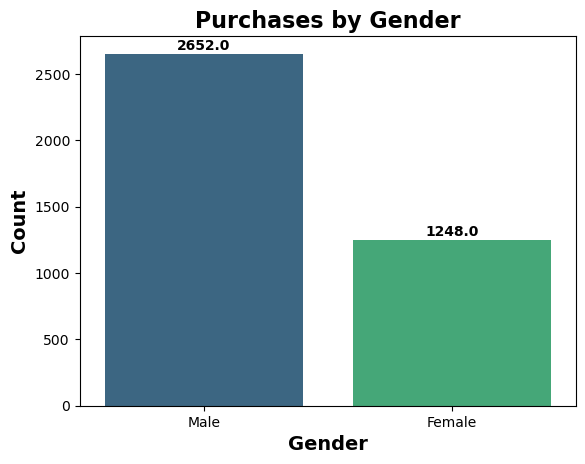

In [64]:
# Buat countplot pada gender
ax = sn.countplot(x='Gender', data=df_new, palette='viridis')
   
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points', weight='bold')

plt.xlabel('Gender', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)
plt.title('Purchases by Gender', weight='bold', fontsize=16)

plt.show()


Pembelian terbanyak sesuai dengan gender adalah male sebesar 2652, sedangkan pembelian female hanya sebesar 1248. Pembeli female kurang dari setengahnya pembeli male.

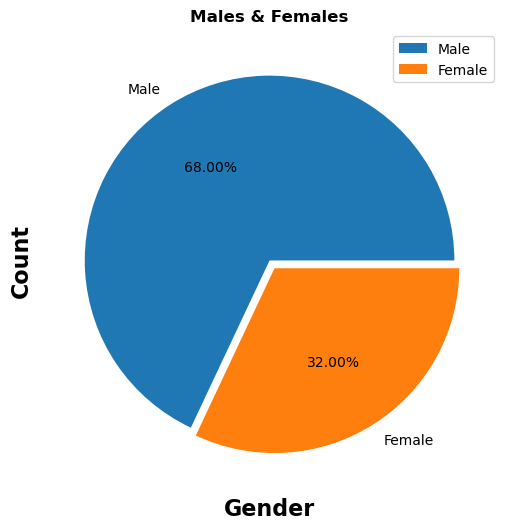

In [ ]:
# Menampilkan presentase pembelian sesuai Gender
plt.figure(figsize = (20,6))
count = df_new.Gender.value_counts()
explode=(0,0.05)
count.plot(kind='pie', explode=explode, autopct='%.2f%%')
plt.title("Males & Females",weight = 'bold')
plt.xlabel('Gender',weight = 'bold', fontsize = 16)
plt.ylabel('Count',weight = 'bold', fontsize = 16)
plt.legend(labels=count.index, loc ='best')
plt.show()

Presentase pembelian sesuai gender adalah Male melakukan pembelian 68.00% dan Female 32.00%, perbandingan antara Gender cukup signifikan. Karena pembeli Female kurang dari setengahnya pembeli Male.

### 5.2- Category apakah yang jumlahnya paling banyak dibeli

In [107]:
# Jumlah penjualan Category paling banyak
count_category = df_new.groupby('Category')['Purchase Amount (USD)'].count().sort_values(ascending=False).reset_index()
count_category

,Category,Purchase Amount (USD)
0,Clothing,1737
1,Accessories,1240
2,Footwear,599
3,Outerwear,324


Dapat disimpulkan bahwa produk clothing memiliki jumlah terbanyak sebesar 1737 dari pada produk lainnya.

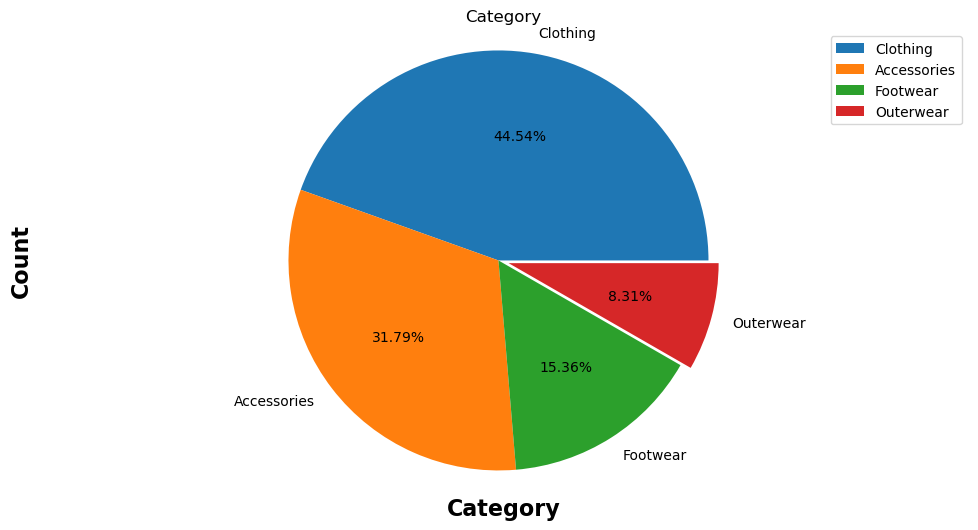

In [67]:
# Menampilkan presentasi pembelian sesuai dengan Category

plt.figure(figsize = (12,6))
count = df_new.Category.value_counts()
explode=(0,0,0,0.05)
count.plot(kind='pie', explode=explode, autopct='%.2f%%')
plt.title("Category")
plt.xlabel('Category',weight = 'bold', fontsize = 16)
plt.ylabel('Count',weight = 'bold', fontsize = 16)
plt.axis('equal')
plt.legend(labels=count.index, loc ='best')
plt.show()

Pembelian sesuai dengan category adalah clothing memiliki penjualan terbanyak sebesar 44.54% dan penjualan kedua terbanyak adalah accessories sebesar 31.79%, Oleh karena itu, perbandingan penjualan dengan Category lainnya cukup signifikan.

### 5.3- Dimanakah Location paling banyak mendapatkan penjualan dari produk Clothing?

In [106]:
location_clo = df_new[df_new['Category'] == 'Clothing']
# Mengelompokkan data berdasarkan 'Location' dan menghitung total profit produk Clothing di setiap lokasi
profit_location_clo = location_clo.groupby('Location')['Previous Purchases'].sum().nlargest(10)
# Mengurutkan DataFrame berdasarkan total profit tiap state
sum_profit_location_clo = profit_location_clo.sort_values(ascending=False).reset_index()
sum_profit_location_clo

,Location,Previous Purchases
0,Montana,1194
1,Illinois,1179
2,California,1176
3,Vermont,1145
4,Idaho,1079
5,Alabama,1066
6,Minnesota,1065
7,South Carolina,1062
8,Arkansas,1054
9,Nevada,1054


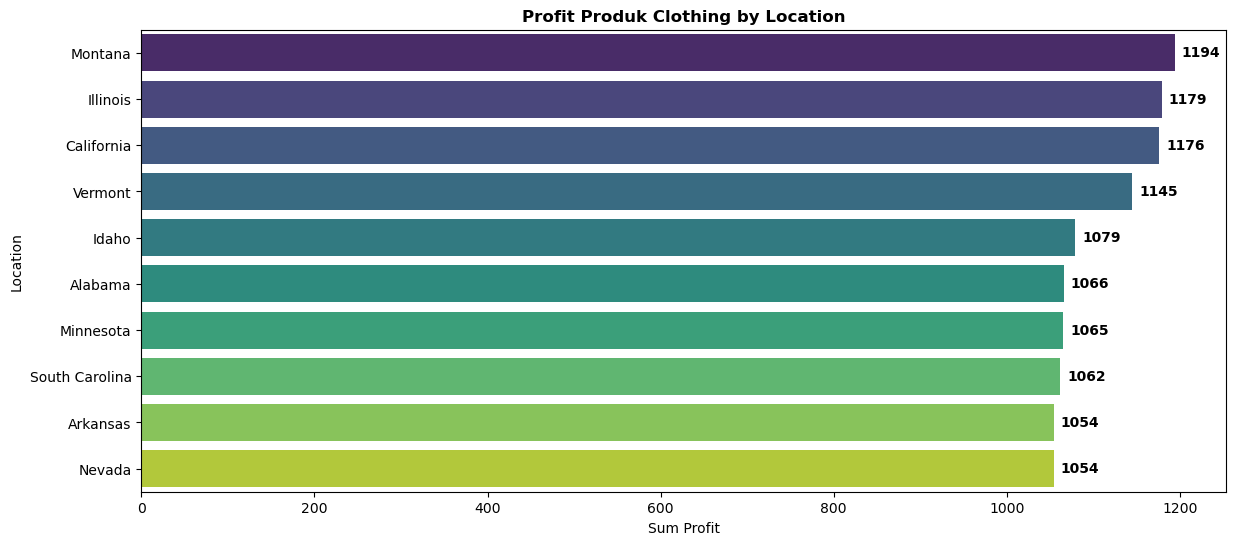

In [87]:

# Group by clothing dari category yang menunjukan pembelian kembali sesuai dengan lokasi
location_clo = df_new[df_new['Category'] == 'Clothing']
profit_location_clo = location_clo.groupby('Location')['Previous Purchases'].sum()
sum_profit_location_clo = profit_location_clo.nlargest(10).sort_values(ascending=False)

# Pembuatan barplot
plt.figure(figsize=(14, 6))
bars = sn.barplot(x=sum_profit_location_clo, y=sum_profit_location_clo.index, palette='viridis')

# Pembuatan nilai pada ujung bar
for p in bars.patches:
    bars.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha='left', va='center', xytext=(5, 0), textcoords='offset points', weight='bold')

plt.title('Profit Produk Clothing by Location', weight='bold')
plt.xlabel('Sum Profit')
plt.ylabel('Location')
plt.show()


Penjualan produk Clothing di setiap location, ditampilkan pada diagram diatas adalah dengan urutan penjualan terbanyak untuk produk clothing di daerah Montana. Tapi dapat dilihat hampir di setiap lokasi tidak terlalu beda penjualannya, karena nilai penjualannya rata-rata di atas 1000.

### 5.4- Mencari pembelian produk Size dengan jumlah terbanyak

In [103]:
# Jumlah pembelian sesuai Size paling banyak
count_size = df_new.groupby('Size')['Previous Purchases'].count().sort_values(ascending=False).reset_index()
count_size

,Size,Previous Purchases
0,M,1755
1,L,1053
2,S,663
3,XL,429


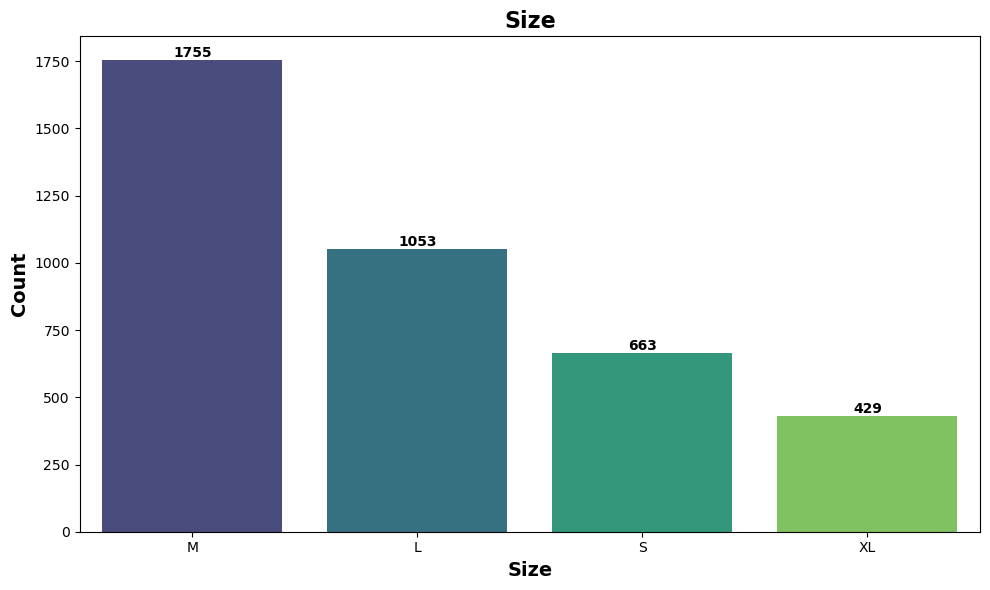

In [71]:
# Pembuatan bar chart
plt.figure(figsize=(10, 6))
sizes = df_new['Size'].value_counts().sort_values(ascending=False)
sn.barplot(x=sizes.index, y=sizes.values, palette='viridis')

plt.xlabel('Size', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)
plt.title('Size', weight='bold', fontsize=16)


# # Pembuatan nilai pada ujung bar
for i, value in enumerate(sizes):
    plt.text(i, value + 0.1, f'{value:.0f}', ha='center', va='bottom', weight='bold')

plt.tight_layout()
plt.show()


Rata - rata pembelian paling banyak di Size M dengan jumlah 1755 dan disusul dengan Size L dengan jumlah 1053, perbandingan antara Size sangat signifikan.

### 5.5- Mencari tahu rata - rata rating yang di berikan sesuai gender

In [101]:
# Hitung rata - rata Rating sesuai Gender
mean_rating_pelanggan = df_new.groupby('Gender')['Review Rating'].mean().reset_index()
mean_rating_pelanggan

,Gender,Review Rating
0,Female,3.741426
1,Male,3.753959


Rata-rata pelanggan memberikan review rating sebesar 3.7

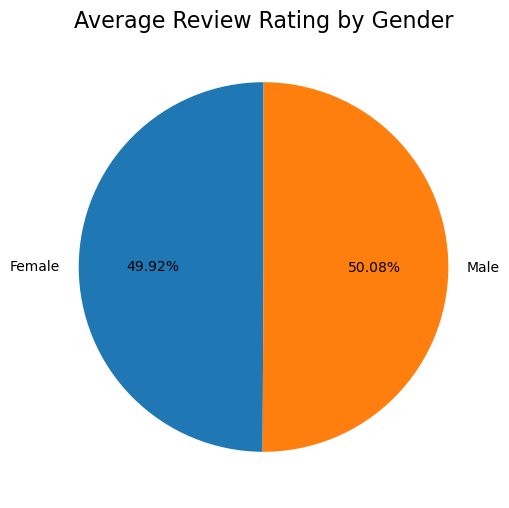

In [73]:
# Menampilkan presentase Review Rating sesuai dengan Gender
plt.figure(figsize=(12, 6))
average_rating_by_gender = df_new.groupby('Gender')['Review Rating'].mean()

average_rating_by_gender.plot(kind='pie', autopct='%.2f%%', startangle=90)

plt.title("Average Review Rating by Gender", fontsize=16)
plt.ylabel('') 

plt.show()


Rata - rata review rating yang diberikan sesuai gender hampir tidak ada perbedaan

### 5.6- Siapakah yang melakukan Previous Purchases terbesar sesuai dengan Gender dengan score tertinggi

In [100]:
# Hitung jumlah Previous Purchases sesuai Gender
count_previous_gender = df_new.groupby('Gender')['Previous Purchases'].count().sort_values(ascending=False).reset_index()
count_previous_gender

,Gender,Previous Purchases
0,Male,2652
1,Female,1248


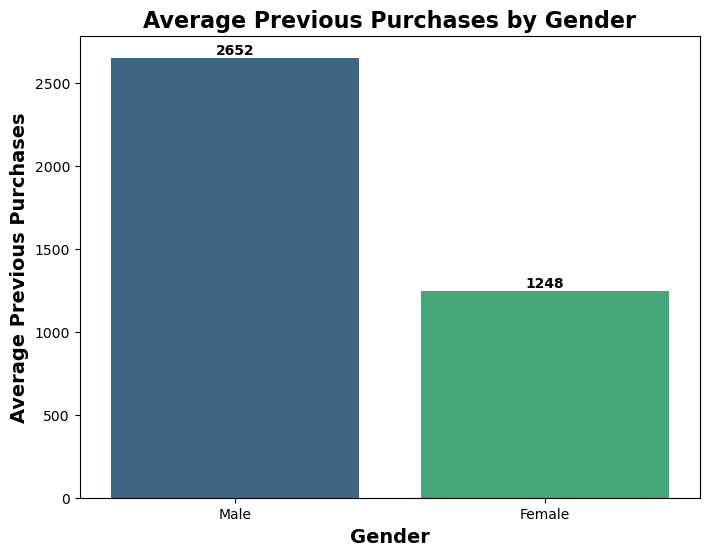

In [75]:
# Hitung Previous Purchases sesuai dengan Gender
count_gen_prepur = df_new.groupby('Gender')['Previous Purchases'].count().sort_values(ascending=False)

# Pembuatan barplot
plt.figure(figsize=(8, 6))
sn.barplot(x=count_gen_prepur.index, y=count_gen_prepur.values, palette='viridis')

# Pembuatan nilai pada ujung bar
for i, value in enumerate(count_gen_prepur):
    plt.text(i, value + 0.1, f'{value:.0f}', ha='center', va='bottom', weight='bold')

plt.xlabel('Gender', weight='bold', fontsize=14)
plt.ylabel('Average Previous Purchases', weight='bold', fontsize=14)
plt.title('Average Previous Purchases by Gender', weight='bold', fontsize=16)
plt.show()


Pelanggan sesuai dengan Gender yang melakukan Previous Purchases paling banyak adalah male dengan score 2652 dan untuk female dengan score 1248, dari kedua gender diatas dapat disimpulkan bahwa female melakukan Previous Purchases kurang dari setengahnya male.

### 5.7- Penjualan pada setiap Season yang memiliki score paling tinggi

In [99]:
# Jumlah pembelian kembali di setiap season
count_previous_season = df_new.groupby('Season')['Previous Purchases'].count().sort_values(ascending=False).reset_index()
count_previous_season

,Season,Previous Purchases
0,Spring,999
1,Fall,975
2,Winter,971
3,Summer,955


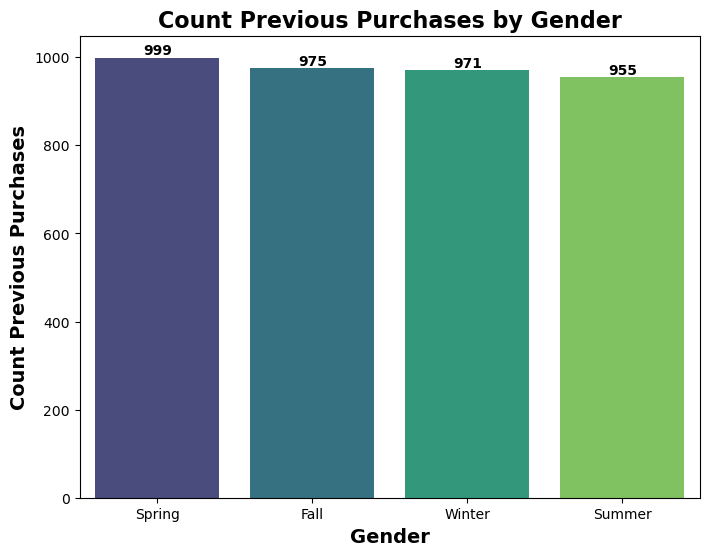

In [77]:
# Pembuatan barplot
plt.figure(figsize=(8, 6))
sn.barplot(x=count_previous_season.index, y=count_previous_season.values, palette='viridis')

# Pembuatan nilai pada ujung bar
for i, value in enumerate(count_previous_season):
    plt.text(i, value + 0.1, f'{value:.0f}', ha='center', va='bottom', weight='bold')

plt.xlabel('Gender', weight='bold', fontsize=14)
plt.ylabel('Count Previous Purchases', weight='bold', fontsize=14)
plt.title('Count Previous Purchases by Gender', weight='bold', fontsize=16)
plt.show()


Dapat disimpulkan bahwa penjualan sesuai Season diatas 900, penjualan sangat stabil pada setiap Season.

### 5.8- Berapakah rata-rata umur yang melakukan pembelian

In [111]:
# Rata-rata umur
mean_umur = df_new['Age'].mean()
mean_umur

44.06846153846154

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2852\1182317150.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  average_previous_purchases = sn.barplot(x='Age', y='Previous Purchases', data=df_new, palette='viridis', ci=None)


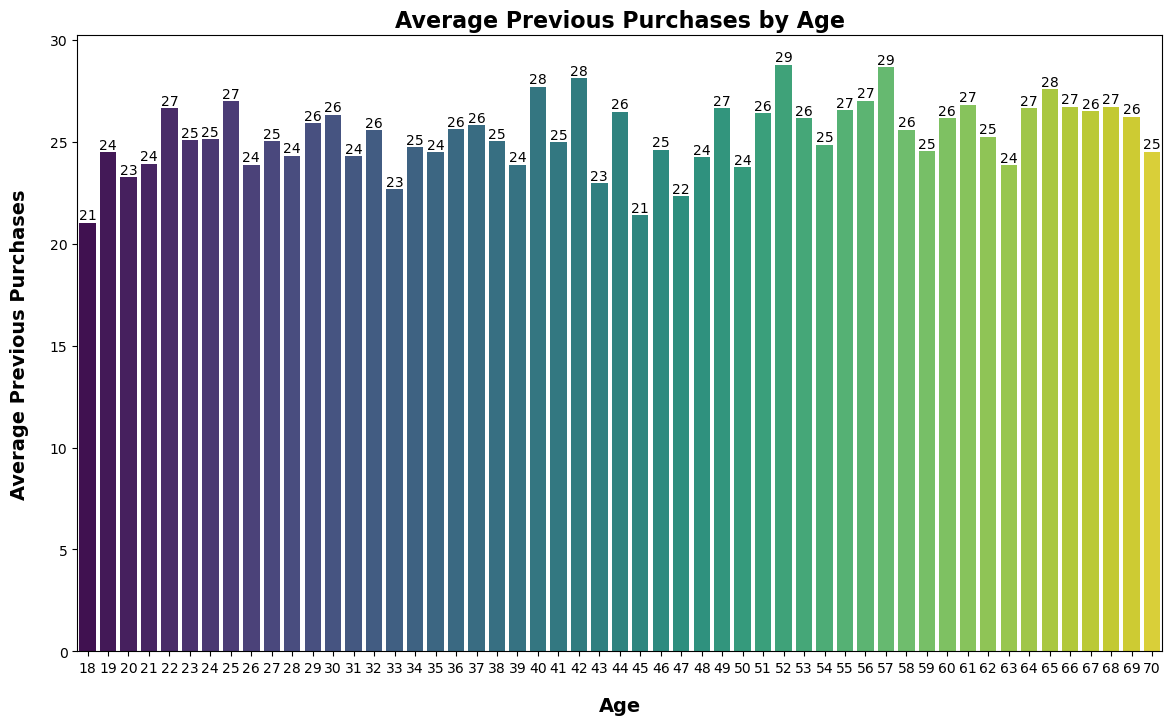

In [112]:
plt.figure(figsize=(14, 8))

# Barplot untuk rata-rata previouse purchases sesuai dengan umur
average_previous_purchases = sn.barplot(x='Age', y='Previous Purchases', data=df_new, palette='viridis', ci=None)

# Pembuatan angka pada ujung bar
for p in average_previous_purchases.patches:
    average_previous_purchases.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                                        ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Age', weight='bold', fontsize=14, labelpad=15)
plt.ylabel('Average Previous Purchases', weight='bold', fontsize=14, labelpad=15)
plt.title('Average Previous Purchases by Age', weight='bold', fontsize=16)

plt.show()


Rata-rata umur adalah 44 dan yang melakukan pembelian adalah berkisaran 25

### 5.9- Penjualan apakah yang sesuai dengan Color yang memiliki total score tertinggi

In [98]:
# Tampilkan total pembelian kembali sesuai dengan color 
sum_previous_color = df_new.groupby('Color')['Previous Purchases'].sum().nlargest(10).sort_values(ascending=False).reset_index()
sum_previous_color

,Color,Previous Purchases
0,Silver,4550
1,Cyan,4519
2,Gray,4499
3,Teal,4438
4,Olive,4337
5,Black,4312
6,Green,4161
7,Peach,4035
8,Violet,4016
9,Yellow,4004


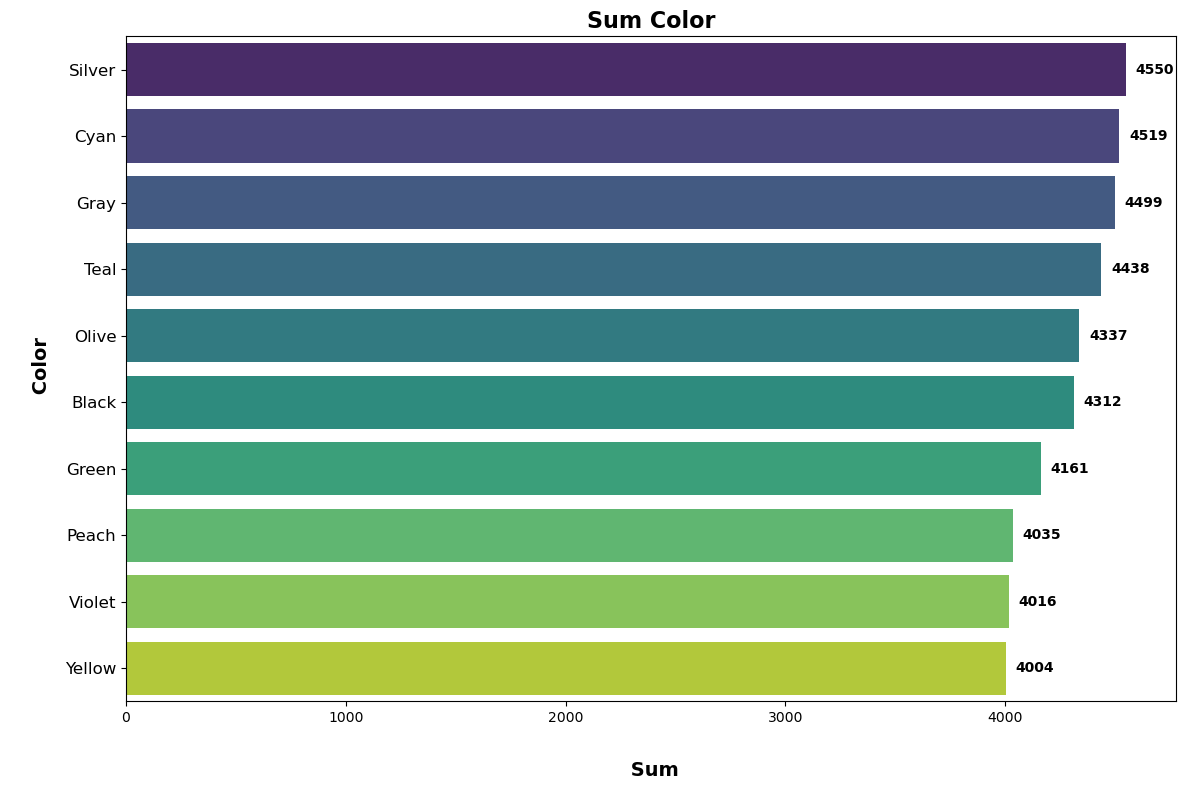

In [80]:
previous_color = df_new[df_new['Color'] == 'Silver']
profit_location_color = previous_color.groupby('Location')['Previous Purchases'].sum()
sum_profit_location_color = profit_location_color.nlargest(10).sort_values(ascending=False)

plt.figure(figsize=(12, 8))

# Plot the sum of purchases for each location with the default Seaborn color palette
bars = sn.barplot(x=sum_profit_location_color.values, y=sum_profit_location_color.index, palette='viridis', order=sum_profit_location_color.index[::-1])

# Annotate each bar with its sum value
for p in bars.patches:
    bars.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha='left', va='center', xytext=(7, 0), textcoords='offset points', weight='bold')

plt.xlabel('\n Sum', weight="bold", fontsize=14, labelpad=10)
plt.ylabel('\n Color', weight="bold", fontsize=14, labelpad=10)
plt.yticks(fontsize=12)  # Increase y-axis tick font size
plt.title('Sum Color', weight='bold', fontsize=16)


plt.tight_layout()
plt.show()


Total penjualan sesuai dengan Color dengan score tertinggi adalah silver dengan score 4550, sedangkan warna lainnya memiliki penjualan rata-rata diatas score 4000.

### 5.10- Payment Method apakah yang sering dipakai oleh pelanggan

In [94]:
# Tampilkan jumlah pembelian kembali 
sum_previous_payme = df_new.groupby('Payment Method')['Previous Purchases'].count().sort_values(ascending=False).reset_index()
sum_previous_payme

,Payment Method,Previous Purchases
0,PayPal,677
1,Credit Card,671
2,Cash,670
3,Debit Card,636
4,Venmo,634
5,Bank Transfer,612


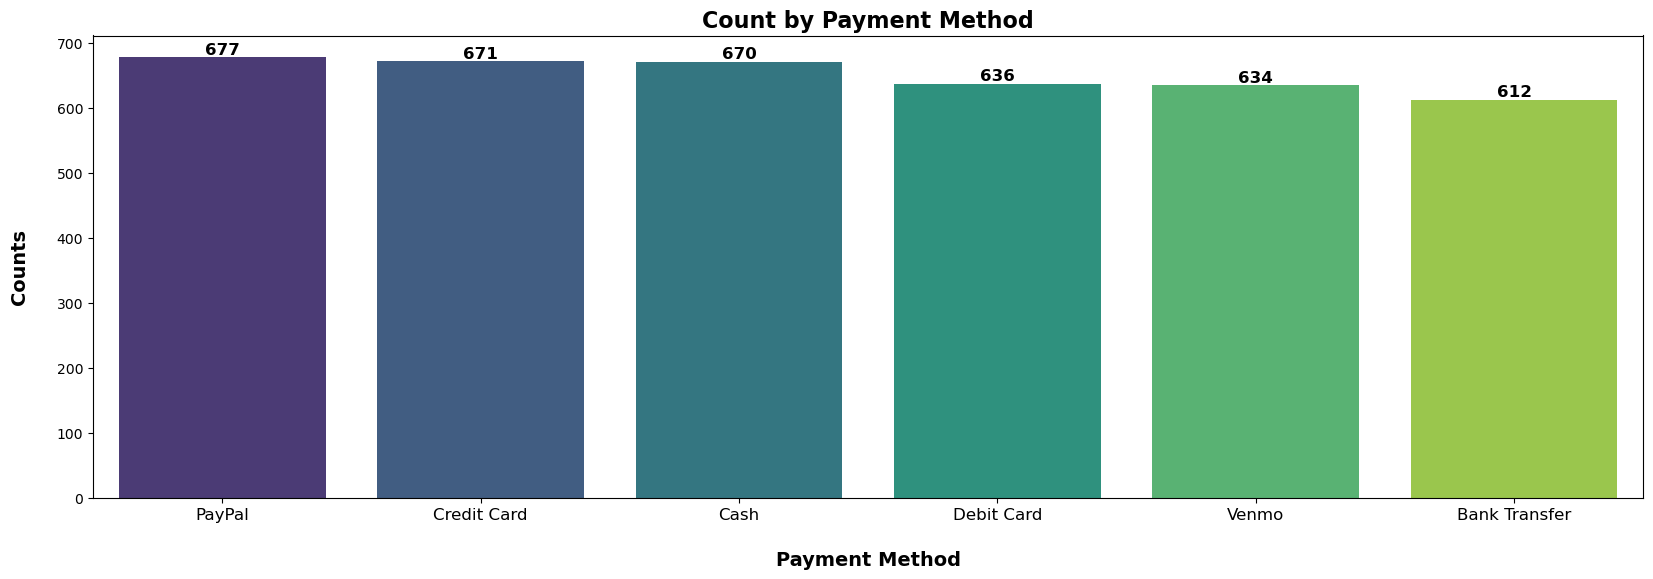

In [81]:
plt.figure(figsize=(20, 6))

# Hitung jumlah payment method
payment_method_counts = df_new['Payment Method'].value_counts()

pay_met = sn.countplot(x='Payment Method', data=df_new, order=payment_method_counts.index, palette='viridis')

# Pembuatan nilai pada ujung bar
for p in pay_met.patches:
    pay_met.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 1),
                     ha='center', va='bottom', color='black', fontsize=12, weight='bold')

plt.xlabel('Payment Method', weight='bold', fontsize=14, labelpad=20)
plt.ylabel('Counts', weight='bold', fontsize=14, labelpad=20)
plt.xticks(rotation=0, fontsize=12)
plt.title('Count by Payment Method', weight='bold', fontsize=16)

plt.show()


Dapat disimpulkan, bahwa disemua jenis Payment Method memiliki rata-rata diatas 600 dan ada 3 jenis pembayaran yang memiliki hampir sama dikisaran 670 adalah Paypal, Credit Card dan Cash.

### 5.11- Penjualan Item Purchased apakah yang memiliki score tertinggi

In [113]:
# Cek Jumlah previous purchases sesuai dengan item purchased
count_previous_item = df_new.groupby('Item Purchased')['Previous Purchases'].count().nlargest(10).sort_values(ascending=False).reset_index()
count_previous_item

,Item Purchased,Previous Purchases
0,Blouse,171
1,Jewelry,171
2,Pants,171
3,Shirt,169
4,Dress,166
5,Sweater,164
6,Jacket,163
7,Belt,161
8,Coat,161
9,Sunglasses,161


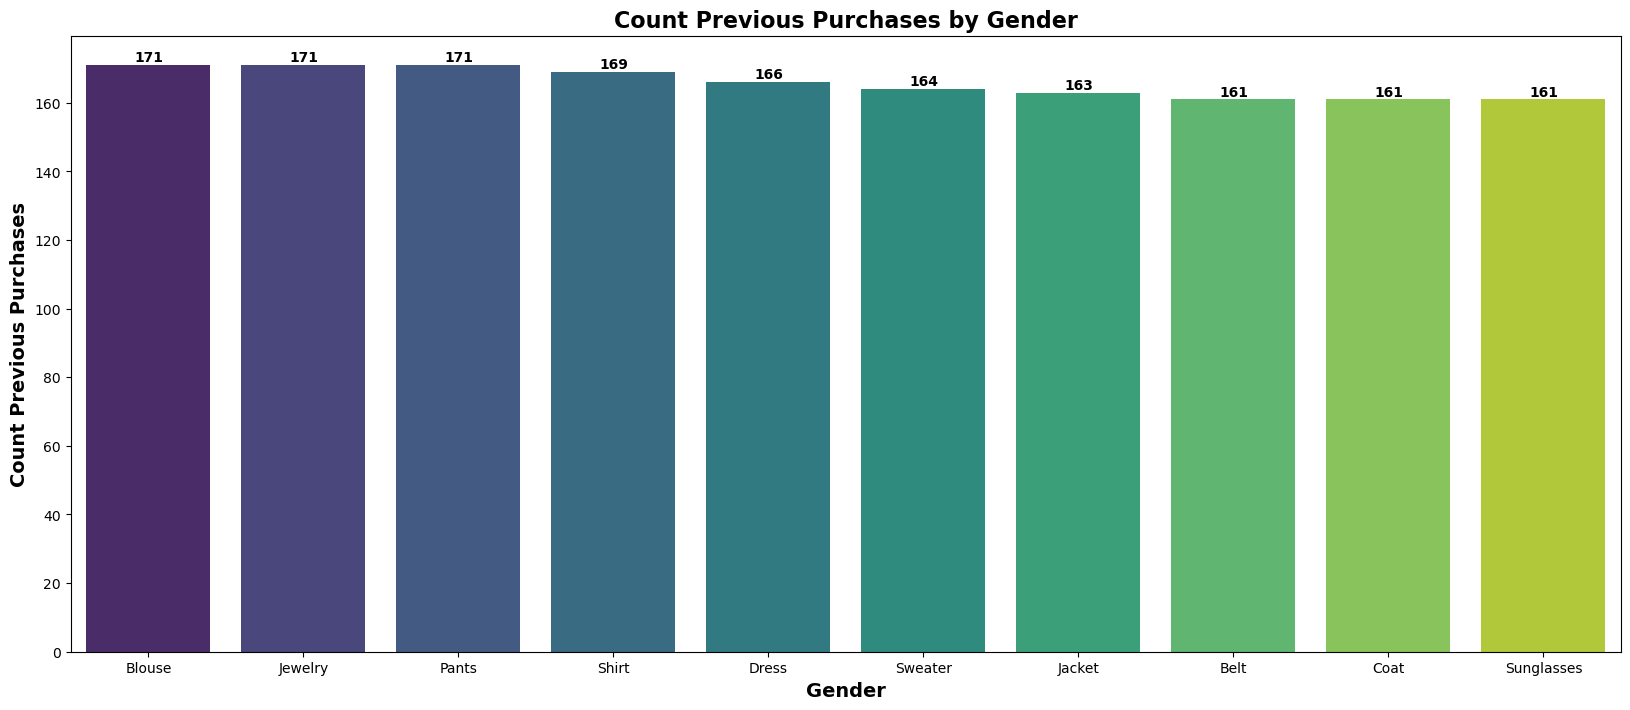

In [83]:
# Pembuatan barplot
plt.figure(figsize=(20,8))
sn.barplot(x=count_previous_item.index, y=count_previous_item.values, palette='viridis')

# Pembuatan nilai pada ujung bar
for i, value in enumerate(count_previous_item):
    plt.text(i, value + 0.1, f'{value:.0f}', ha='center', va='bottom', weight='bold')

plt.xlabel('Gender', weight='bold', fontsize=14)
plt.ylabel('Count Previous Purchases', weight='bold', fontsize=14)
plt.title('Count Previous Purchases by Gender', weight='bold', fontsize=16)
plt.show()


Dapat disimpulkan bahwa hampir semua produk pada Item Purchased tidak ada perbedaan yang signifikan.

### 5.12- Statistic Descriptive dengan metode Central Tendency

Statistics descriptive : Apakah location Montana dan California memliki pembelian tertinggi dan memiliki perbedaan yang signifikan yang sesuai dengan gender, season, category, color dan size, cek menggunakan two sample location

**Mencari Mean, Median, dan Mode dari Category, Gender dan Season yang membeli pada produk Clothing.**

In [84]:
print('Rata rata profit pada produk clothing:', location_clo['Previous Purchases'].mean())
print('Median profit pada produk clothing:',location_clo['Previous Purchases'].median())
print('Mode profit pada produk clothing:',location_clo['Previous Purchases'].mode().values[0])

Rata rata profit pada produk clothing: 25.199194012665515
Median profit pada produk clothing: 25.0
Mode profit pada produk clothing: 31


### 5.13- Statistics inferential

**Melakukan Hipotesis**

**H0  :** Tidak ada hubungan dengan Kebiasaan membeli.

**H1  :** Ada hubungan antara  dengan Kebiasaan membeli.

In [85]:
# Melakukan uji Hypothesis Testing dengan two sample untuk kedua negara
mon = location_clo[location_clo['Location'] == 'Montana']['Previous Purchases']
illi = location_clo[location_clo['Location'] == 'Illinois']['Previous Purchases']

t_statistic, p_value = stats.ttest_ind(mon, illi)

# panggin uji Hypothesis Testing
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

T-Statistic: 0.3152206785390345
P-Value: 0.7533320142724389


**Insight :**

Karena p-value lebih dari 0.05 maka H0 yang dipakai dipastikan bahwa lokasi Montana dan Illinois tidak ada hubungannya dengan kebiasaan membeli.

# 6-Conclusion

**Kesimpulan :**

1. Gender yang melakukan pembelian terbanyak adalah laki-laki dan penjualan produk paling banyak adalah clothing dengan score tertinggi 1737.

2. Untuk pembelian terbanyak menurut lokasi adalah hampir semua lokasi tidak memiliki perbedaan yang tidak signifikan dan untuk review rating yang di berikan oleh pelanggan rata-rata sebesar 3.7, oleh maka dari itu perusahaan harus meningkatkan pelayanan dan kepuasaan pelanggan, termasuk produk yang lebih menarik lagi.

3. Untuk pembelian terbanyak antara Size, Gender, Color dan Item Purchased , pelanggan lebih banyak membeli produk dengan Size M dengan score 1755, kemudian untuk Gender sebesar 2652, sesuai dengan Color adalah Silver sebesar 4550 dan sesuai dengan Item Purchased adalah Blouse, Jewelry dan Pants memiliki nilai yang sama sebesar 171. 

4. Dari pembayaran yang paling sering digunakan pelanggan adalah Paypal dengan nilai sebesar 677, tapi hampir dari semua Payment Method tidak memiliki perbedaan yang signifikan yaitu dengan rata-rata 600 keatas.

5. Disetiap penjualan pada Season hampir tidak ada perbedaan yang signifikan, karena penjualan di setiap season diatas 900 keatas.

6. Karena p-value pada location lebih tinggi dari 0.05 maka H0 diterima, karena tidak ada hubungannya dengan kebiasaan membeli.
   
7. Jadi perusahaan dapat meningkatkan profit sebesar 15%, agar dapat meningkatkan penjualan dan kepuasaan pelanggan. Dengan cara menambahkan produk yang lebih menarik, menambahkan produk female lebih banyak, memperbaiki pelayanan, dan memperbarui suasana outlet penjualan. Oleh karena itu, pelanggan akan lebih tertarik lagi untuk melakukan pembelian yang lebih banyak.